In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

# Window functions are like aggregation functions
## You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

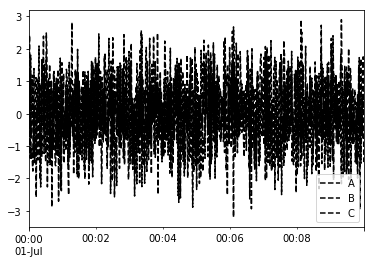

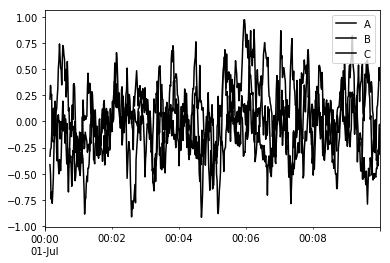

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [4]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.548189,0.132730,1.048783
2016-07-01 00:00:02,-0.399862,-0.032316,0.131947
2016-07-01 00:00:03,-0.406354,0.522339,0.073714
2016-07-01 00:00:04,-0.490813,0.381826,-0.298384
2016-07-01 00:00:05,-0.433212,0.375900,-0.471516
2016-07-01 00:00:06,-0.101269,0.518247,-0.677916
2016-07-01 00:00:07,-0.049181,0.460448,-0.886503
2016-07-01 00:00:08,-0.123717,0.162004,-0.782338
2016-07-01 00:00:09,-0.360527,0.153909,-0.414405


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,1.313560,0.295480,0.310899,0.154375
2016-06-07,1.026230,2.067461,-2.015046,1.279885
2016-06-08,-1.267969,0.447967,1.207288,1.244432
2016-06-09,-1.282525,1.033456,0.252367,1.478525
2016-06-10,-0.119171,-0.015504,-0.789005,0.084658


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a96a080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11adf8d30>], dtype=object)

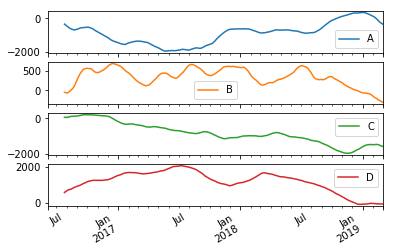

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.662715,0.767075,1.094263,1.793762


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,1.826675,1.329210,-0.696624,0.794317
2016-06-08,1.575057,1.823109,-0.630036,1.422442
2016-06-09,1.128616,2.328423,-0.533650,2.106136
2016-06-10,0.836918,2.628510,-0.633620,2.533283
